 ###### The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

##### The data-set aims to answer the following key questions:

Does various predicting factors which has been chosen initially really affect the Life expectancy? 

What are the predicting variables actually affecting the life expectancy?

Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

How does Infant and Adult mortality rates affect life expectancy?

Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

What is the impact of schooling on the lifespan of humans?

Does Life Expectancy have positive or negative relationship with drinking alcohol?

Do densely populated countries tend to have lower life expectancy?

What is the impact of Immunization coverage on life Expectancy?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
life = pd.read_csv("C:/Users/sriharsha/Desktop/data science/data sets/life Expectancy Kaggle/Life Expectancy Data.csv",)
life_copy = life.copy()
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
life.columns
#there are some column names with Extra White space front and back

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
life.columns = life.columns[:].str.strip()

In [5]:
life.columns = life.columns.str.lower()
life.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [6]:
life.status.replace(to_replace=['Developing', 'Developed'],value=[0,1],inplace = True)
#replacing Developing with 0 and Developed with 1 inorder to add them in correlation matrix

In [7]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   int64  
 3   life expectancy                  2928 non-null   float64
 4   adult mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   hepatitis b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  polio               

In [8]:
life.describe().T


,count,mean,std,min,25%,50%,75%,max
year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
status,2938.0,1.742682e-01,3.794045e-01,0.00000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
adult mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
hepatitis b,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
bmi,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01


In [9]:
#Schooling Column
life.schooling.fillna(value = 12,inplace = True)
#there is no big difference between mean median which tells us that there is very little to no outliers


In [10]:
#life expectancy column
life.iloc[:,3].mean()#69.224
life.iloc[:,3].median()#72.1
life.iloc[:,3].describe()
life['life expectancy'].fillna(method = 'ffill', inplace = True)

#filling the value of previous valid row in the none place


In [11]:
#adult mortality
life['adult mortality'].describe()
life['adult mortality'].isnull().sum()
life['adult mortality'].fillna(method = 'bfill',inplace =True)#filling the value of previous valid row in the none place

In [12]:
life['total expenditure'].mean()#5.938
life['total expenditure'].median()#5.755


5.755

In [13]:
life['total expenditure'].fillna(value=life['total expenditure'].median(),inplace =True)

In [14]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   int64  
 3   life expectancy                  2938 non-null   float64
 4   adult mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   hepatitis b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  polio               

In [15]:
#mean-4.602,median-3.755,std - 4.05
life.alcohol.describe()
life.alcohol.fillna(method = 'bfill',inplace = True,)
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   int64  
 3   life expectancy                  2938 non-null   float64
 4   adult mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   hepatitis b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  polio               

In [16]:
life['gdp'].fillna(method = 'pad',inplace =True)
# life['population'].fillna(method = 'pad',inplace =True)


In [17]:
life.population = life.population/1000
life.population.describe()#std is more so we cannot take mean or median

count    2.286000e+03
mean     1.275338e+04
std      6.101210e+04
min      3.400000e-02
25%      1.957933e+02
50%      1.386542e+03
75%      7.420359e+03
max      1.293859e+06
Name: population, dtype: float64

In [18]:
life.drop(labels = 'thinness 5-9 years',axis = 1,inplace = True)



In [19]:
life.drop(labels = 'under-five deaths',axis = 1,inplace = True)


In [20]:
# life.bmi.fillna(method = 'bfill',inplace = True)
# 

In [21]:
life['income composition of resources'].mean()#0.627
life['income composition of resources'].median()#0.677
life['income composition of resources'].fillna(method='pad',inplace = True)
#filling the value of previous valid row in the none place

In [22]:
life['hepatitis b'].describe()

count    2385.000000
mean       80.940461
std        25.070016
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: hepatitis b, dtype: float64

In [23]:
life['hepatitis b'].fillna(method ='pad',inplace = True)

In [24]:
life['polio'].fillna(method ='pad',inplace = True)

In [25]:
life['bmi'].fillna(method ='pad',inplace = True)

In [26]:
life['diphtheria'].fillna(method ='pad',inplace = True)

In [27]:
life['thinness  1-19 years'].fillna(method ='pad',inplace = True)

In [28]:
life.isnull().sum().sum()

652

In [29]:
life.dropna(inplace = True)

In [30]:
#Shows How every Column is related to the Target Variable
life_rel = life.corr()
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2286 non-null   object 
 1   year                             2286 non-null   int64  
 2   status                           2286 non-null   int64  
 3   life expectancy                  2286 non-null   float64
 4   adult mortality                  2286 non-null   float64
 5   infant deaths                    2286 non-null   int64  
 6   alcohol                          2286 non-null   float64
 7   percentage expenditure           2286 non-null   float64
 8   hepatitis b                      2286 non-null   float64
 9   measles                          2286 non-null   int64  
 10  bmi                              2286 non-null   float64
 11  polio                            2286 non-null   float64
 12  total expenditure   

<AxesSubplot:>

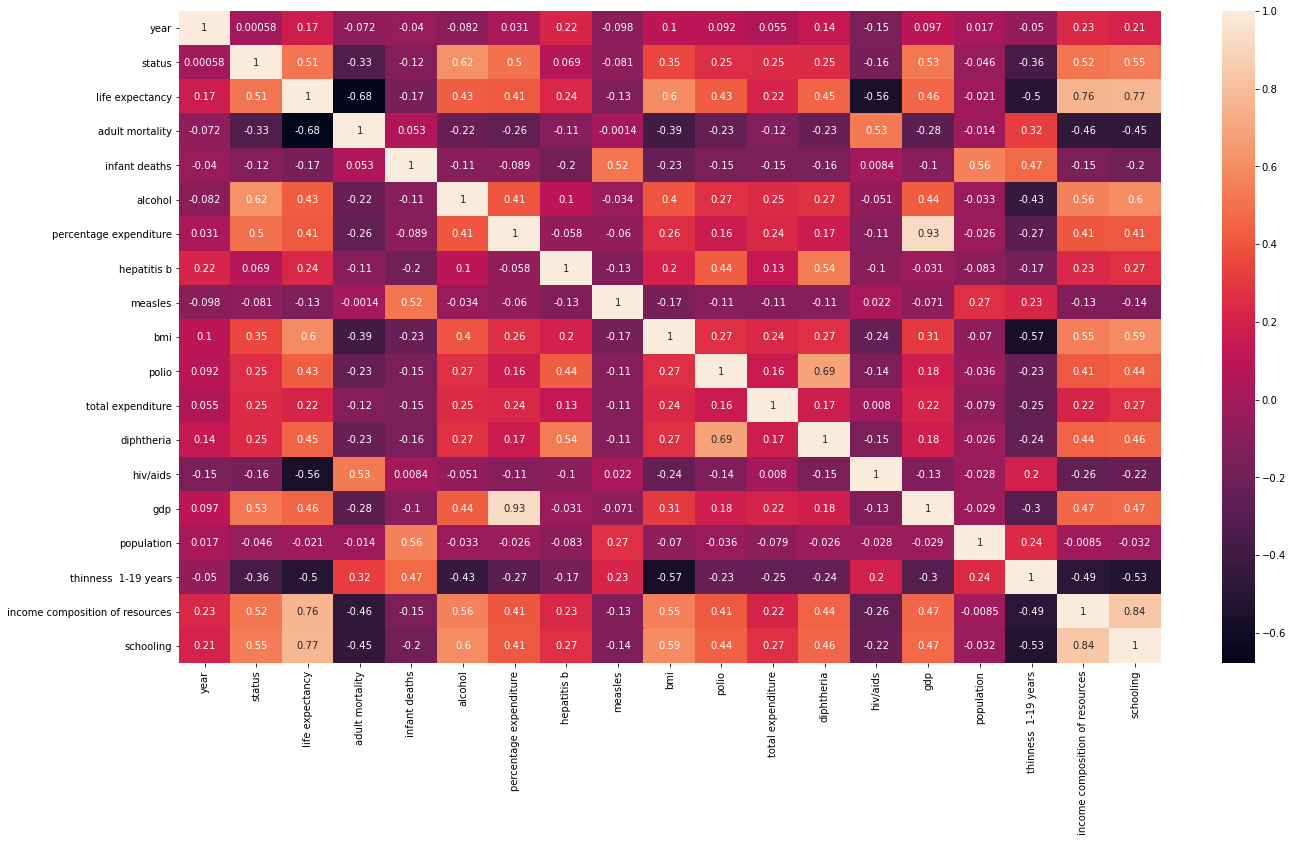

In [31]:
plt.figure(figsize = (22,12) )
sns.heatmap(data = life_rel,annot = True)

In [32]:
#Under Five deaths and infant mortality rate are highly correlated with (100%) so we can drop any one of them(under five deaths)
#similarly THinnes 1-19 and thinness 5-9 are also highly correlated(0.94%) and both are equally correlated with target variable


#### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [34]:
lr = LinearRegression()

In [56]:
#we are considering only those fetures that Show atleast +- 0.1 correlation
#population is under 0.1 so we are not considering it as a good feature
x = life[['year', 'status', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness  1-19 years',
       'income composition of resources', 'schooling']]
# Grouping All the Features into X
y = life[['life expectancy']]
# Grouped target variable to Y



In [57]:
train_x,test_x,train_y,test_y = train_test_split(x,y)

In [58]:
lr.fit(train_x,train_y)

LinearRegression()

In [59]:
y_pred = lr.predict(test_x)

In [60]:
lracc = r2_score(test_y,y_pred)
lracc*100

84.96711755812419

### DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1)

In [62]:
dtr.fit(train_x,train_y)

DecisionTreeRegressor(random_state=1)

In [64]:
y_p = dtr.predict(test_x)


In [65]:
dtr_acc = r2_score(test_y,y_p)
dtr_acc*100

93.22427435483061